Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.
Variable
Description
Loan_ID
Unique Loan ID
Gender
Male/ Female
Married
Applicant married (Y/N)
Dependents
Number of dependents
Education
Applicant Education (Graduate/ Under Graduate)
Self_Employed
Self employed (Y/N)
ApplicantIncome
Applicant income
CoapplicantIncome
Coapplicant income
LoanAmount
Loan amount in thousands
Loan_Amount_Term
Term of loan in months
Credit_History
credit history meets guidelines
Property_Area
Urban/ Semi Urban/ Rural
Loan_Status
(Target) Loan approved (Y/N)
Task: You are asked to predict loan eligibility using Ensemble Learning algorithms such as Voting, BaggingClassifier, GradientBoostingClassifier, XGBClassifier, lightgbm, CatBoostClassifier.

In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report 

from sklearn.ensemble import BaggingClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler


from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier 
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings 
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


In [13]:
df1=pd.read_csv('loan_prediction.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
import copy
df=copy.deepcopy(df1)

In [17]:
df.shape

(614, 13)

In [19]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [23]:
# imbalanced data

In [25]:
df.isnull().sum().sum() # need replace nulls

149

In [27]:
df.info(), df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
 Loan_ID              614
 Gender                 2
 Married                2
 Dependents             4
 Education              2
 Self_Employed          2
 ApplicantIncome      505
 CoapplicantIncome    287
 LoanAmount           203
 Loan_Amount_Term      10
 Credit_History         2
 Property_Area          3
 Loan_Status            2
 dtype: int64)

In [29]:
"""0   Loan_ID                 object   614  no need => drop
 1   Gender                 object   2    OneHotEncoder
 2   Married                object   2    OneHotEncoder
 3   Dependents             object   4    OneHotEncoder  [0,1,2,3+,nan]
 4   Education              object   2    OneHotEncoder
 5   Self_Employed          object   2    OneHotEncoder
 6   ApplicantIncome        int64    
 7   CoapplicantIncome      float64
 8   LoanAmount             float64
 9   Loan_Amount_Term       float64
 10  Credit_History         float64
 11  Property_Area          object   3   OneHotEncoder  [Urban/semi urban/rural]
 12  Loan_Status            object   2   OneHotEncoder

- drop
-one hot
- replace null
- train test split
- scaler
-undersampling and oversampling 
- bagging and boosting models"""

'0   Loan_ID                 object   614  no need => drop\n 1   Gender                 object   2    OneHotEncoder\n 2   Married                object   2    OneHotEncoder\n 3   Dependents             object   4    OneHotEncoder  [0,1,2,3+,nan]\n 4   Education              object   2    OneHotEncoder\n 5   Self_Employed          object   2    OneHotEncoder\n 6   ApplicantIncome        int64    \n 7   CoapplicantIncome      float64\n 8   LoanAmount             float64\n 9   Loan_Amount_Term       float64\n 10  Credit_History         float64\n 11  Property_Area          object   3   OneHotEncoder  [Urban/semi urban/rural]\n 12  Loan_Status            object   2   OneHotEncoder\n\n- drop\n-one hot\n- replace null\n- train test split\n- scaler\n-undersampling and oversampling \n- bagging and boosting models'

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [33]:
# Need using Scaler, let's use RobustScaler

# Fillna nulls

In [36]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
cat_col= ['Gender', 'Married', 'Dependents','Self_Employed', 'Credit_History']
num_col= ['LoanAmount','Loan_Amount_Term']

In [40]:
for col in num_col:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

In [42]:
for col in cat_col:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [44]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

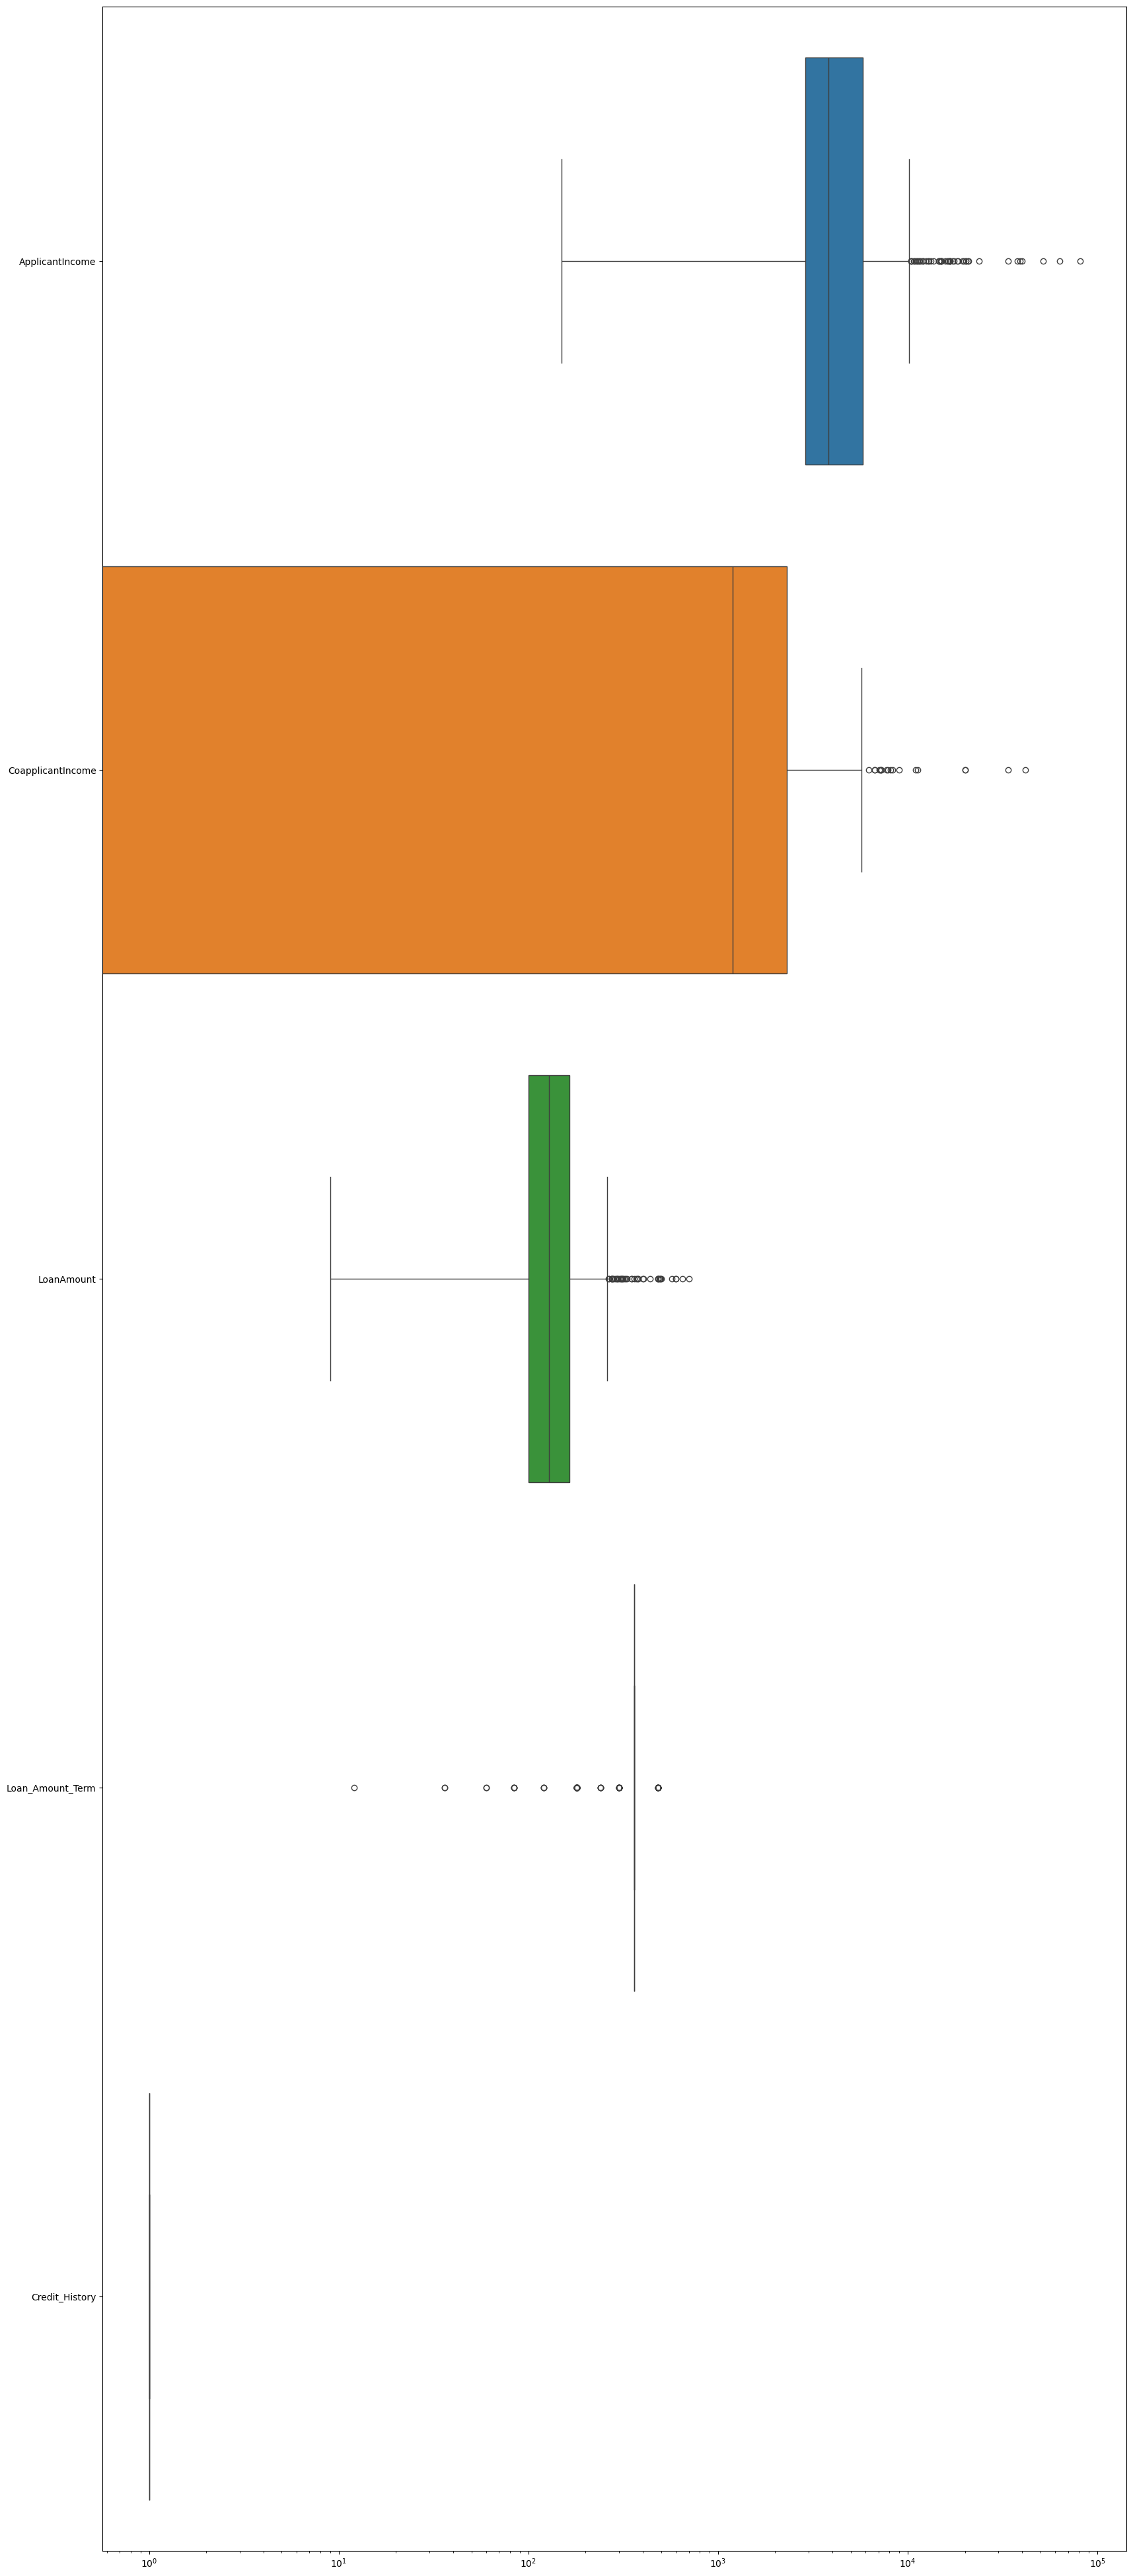

In [46]:
%matplotlib inline

plt.figure(figsize = (20,50))
ax = sns.boxplot(data = df, orient = "h")
ax.set(xscale = "log")
plt.show

In [48]:
# Need using Scaler,  RobustScaler will be most appropriate

### Drop and One Hot E

In [51]:
df.drop('Loan_ID', axis=1, inplace=True)

In [53]:
df_dummies=pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)
df_dummies

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,False,False,False,False,False,False,False,False,False,True
610,4106,0.0,40.0,180.0,1.0,True,True,False,False,True,False,False,False,False,True
611,8072,240.0,253.0,360.0,1.0,True,True,True,False,False,False,False,False,True,True
612,7583,0.0,187.0,360.0,1.0,True,True,False,True,False,False,False,False,True,True


In [55]:
df_dummies=df_dummies.replace({ True:1, False:0})

In [57]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    int64  
 6   Married_Yes              614 non-null    int64  
 7   Dependents_1             614 non-null    int64  
 8   Dependents_2             614 non-null    int64  
 9   Dependents_3+            614 non-null    int64  
 10  Education_Not Graduate   614 non-null    int64  
 11  Self_Employed_Yes        614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [59]:
df_final=df_dummies

In [61]:
df_final['Loan_Status_Y'].value_counts()

Loan_Status_Y
1    422
0    192
Name: count, dtype: int64

## Train test split , Robust Scaler

In [64]:
X = df_final.iloc[:, :-1]
y = df_final.iloc[:, [-1]]  # Loan_Status - target - last column

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y)

In [68]:
scaler=RobustScaler()
X_train.iloc[:,:] = scaler.fit_transform(X_train) # iloc for stay X as dataframe, not change to array
X_test.iloc[:,:] = scaler.transform(X_test)

## Oversampling

In [71]:
df_final['Loan_Status_Y'].value_counts()

Loan_Status_Y
1    422
0    192
Name: count, dtype: int64

In [73]:
ros = RandomOverSampler(random_state = 0)

In [75]:
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [77]:
y_train_os.value_counts()

Loan_Status_Y
0                337
1                337
Name: count, dtype: int64

In [79]:
y_train.value_counts()

Loan_Status_Y
1                337
0                154
Name: count, dtype: int64

## Undersampling

In [82]:
undersample = NearMiss(version = 1, n_neighbors = 3)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

In [84]:
y_train_us.value_counts()

Loan_Status_Y
0                154
1                154
Name: count, dtype: int64

In [86]:
y_train.value_counts()

Loan_Status_Y
1                337
0                154
Name: count, dtype: int64

## Bagging Classifier (Bootstrap aggregating)

In [89]:
# try without over or undersampling

In [91]:
svm = SVC(probability = True)

bag = BaggingClassifier(estimator = svm, n_estimators = 10, max_samples = 0.4, max_features = 7, 
                       bootstrap = True, bootstrap_features = True, random_state = 123)

In [93]:
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.95      0.50      0.66        38
           1       0.82      0.99      0.89        85

    accuracy                           0.84       123
   macro avg       0.88      0.74      0.77       123
weighted avg       0.86      0.84      0.82       123



In [95]:
# after oversampling, our model learned 0s better

In [97]:
bag.fit(X_train_os, y_train_os)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66        38
           1       0.87      0.78      0.82        85

    accuracy                           0.76       123
   macro avg       0.73      0.76      0.74       123
weighted avg       0.78      0.76      0.77       123



In [99]:
#after undersampling our model learned worse than before

In [101]:
bag.fit(X_train_us, y_train_us)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.43      0.71      0.53        38
           1       0.82      0.58      0.68        85

    accuracy                           0.62       123
   macro avg       0.62      0.64      0.61       123
weighted avg       0.70      0.62      0.63       123



In [103]:
# results after undersampling  and oversampling is worse than before
# so let's build next models with X_train, y_train 

In [105]:
classifier = RandomForestClassifier()
bag_rf = BaggingClassifier(estimator = classifier, n_estimators = 10, max_samples = 0.4, max_features = 7, 
                       bootstrap = True, bootstrap_features = True, random_state = 123)


In [107]:
bag_rf.fit(X_train, y_train)
bag_pred = bag_rf.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        38
           1       0.81      0.96      0.88        85

    accuracy                           0.82       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.83      0.82      0.80       123



## Gradient Boosting Classifier

In [110]:
gbc = GradientBoostingClassifier(random_state = 0)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       0.83      0.95      0.89        85

    accuracy                           0.83       123
   macro avg       0.83      0.75      0.78       123
weighted avg       0.83      0.83      0.82       123



## XGB Classifier

In [114]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67        38
           1       0.85      0.86      0.85        85

    accuracy                           0.80       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.80      0.80      0.80       123



## lightgbm

In [117]:
lightgbm = lgb.LGBMClassifier()
lightgbm.fit(X_train, y_train)
lightgbm_pred = lightgbm.predict(X_test)
print(classification_report(y_test, lightgbm_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 337, number of negative: 154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.686354 -> initscore=0.783130
[LightGBM] [Info] Start training from score 0.783130
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

## CatBoostClassifier

In [121]:
catboost= CatBoostClassifier(iterations=2,
                          learning_rate=1,
                          depth=2)

catboost.fit(X_train, y_train)
catboost_pred = catboost.predict(X_test)
print(classification_report(y_test, catboost_pred))

0:	learn: 0.5039831	total: 137ms	remaining: 137ms
1:	learn: 0.4999887	total: 138ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



## Voting

In [125]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)


In [127]:
model1.__class__.__name__
print(model1.__class__.__name__ , classification_report(y_test, model1_pred))
print(model2.__class__.__name__ , classification_report(y_test, model2_pred))
print(model3.__class__.__name__ , classification_report(y_test, model3_pred))

LogisticRegression               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

DecisionTreeClassifier               precision    recall  f1-score   support

           0       0.55      0.61      0.57        38
           1       0.81      0.78      0.80        85

    accuracy                           0.72       123
   macro avg       0.68      0.69      0.69       123
weighted avg       0.73      0.72      0.73       123

SVC               precision    recall  f1-score   support

           0       0.75      0.08      0.14        38
           1       0.71      0.99      0.82        85

    accuracy                           0.71       123
   macro avg       0.73      0.53      0.48       123
weighted avg       0.72     

##### Hard voting

In [130]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3) ] 
voting_hard = VotingClassifier(estimators, voting="hard")
voting_hard.fit(X_train, y_train)
voting_hard_pred = voting_hard.predict(X_test)
print(classification_report(y_test, voting_hard_pred))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64        38
           1       0.81      0.98      0.89        85

    accuracy                           0.83       123
   macro avg       0.86      0.74      0.77       123
weighted avg       0.84      0.83      0.81       123



##### Soft voting

In [133]:
model4 = SVC(probability=True)  # need probability for soft voting, that's why build model4 with Probability=true
estimators = [('lr', model1), ('dt', model2) , ('svm', model4) ] 
voting_soft = VotingClassifier(estimators, voting="soft")
voting_soft.fit(X_train, y_train)
voting_soft_pred = voting_soft.predict(X_test)
print(classification_report(y_test, voting_soft_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61        38
           1       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



In [135]:
# CatBoost has the highest F1 score and accuracy